In [1]:
from transformers import AlbertForMaskedLM, AlbertConfig

/home/jhm9507/anaconda3/envs/convlab/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jhm9507/anaconda3/envs/convlab/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jhm9507/anaconda3/envs/convlab/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jhm9507/anaconda3/envs/convlab/lib

In [2]:
config = AlbertConfig()
config

AlbertConfig {
  "attention_probs_dropout_prob": 0,
  "bos_token_id": 2,
  "classifier_dropout_prob": 0.1,
  "embedding_size": 128,
  "eos_token_id": 3,
  "hidden_act": "gelu_new",
  "hidden_dropout_prob": 0,
  "hidden_size": 4096,
  "initializer_range": 0.02,
  "inner_group_num": 1,
  "intermediate_size": 16384,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "albert",
  "num_attention_heads": 64,
  "num_hidden_groups": 1,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "type_vocab_size": 2,
  "vocab_size": 30000
}

In [18]:
config.hidden_size = 512
config.num_attention_heads = 1
config.num_hidden_layers = 1
config.intermediate_size = 2048

In [19]:
bert = AlbertForMaskedLM(config)

In [20]:
bert.albert.pooler

AlbertForMaskedLM(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=512, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((512,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=512, out_features=512, bias=True)
                (key): Linear(in_features=512, out_features=512, bias=True)
                (value): Linear(in_features=512, out_features=512, bias=True)
  

In [21]:
import torch
inputs = torch.randint(0, 100, size=(4, 10))
labels = torch.ones(4, 10, dtype=torch.int64) * -100
pad_mask = (inputs != 0)
outputs = bert.forward(inputs, masked_lm_labels=labels, attention_mask=pad_mask)

In [22]:
outputs

(tensor(0., grad_fn=<NllLossBackward>),
 tensor([[[ 0.2018,  0.0357, -0.2260,  ..., -0.3051,  0.0437, -0.1146],
          [-0.3057,  0.2360, -0.1041,  ..., -0.1273,  0.0296, -0.1176],
          [ 0.0757,  0.2289, -0.6430,  ..., -0.1536,  0.3536, -0.3668],
          ...,
          [ 0.1105,  0.1039,  0.2597,  ..., -0.4288, -0.1040,  0.0566],
          [ 0.0192,  0.5559, -0.2161,  ...,  0.0054, -0.0051, -0.1597],
          [-0.6139,  0.3300,  0.1651,  ...,  0.0065,  0.0648, -0.1723]],
 
         [[-0.4181,  0.2075,  0.2778,  ..., -0.2060,  0.2420, -0.2450],
          [-0.4150, -0.0815,  0.0511,  ..., -0.1214,  0.0697, -0.1008],
          [-0.2592,  0.1347, -0.3578,  ..., -0.1039,  0.1765, -0.1790],
          ...,
          [ 0.1316, -0.0120,  0.1974,  ..., -0.1917, -0.0636, -0.0431],
          [-0.1747,  0.3553, -0.1830,  ...,  0.1738,  0.1269, -0.1032],
          [-0.2981,  0.1415,  0.1978,  ..., -0.2009,  0.1966, -0.3435]],
 
         [[-0.1153,  0.2889,  0.0591,  ..., -0.0131, -0.2372

In [16]:
from torchviz import make_dot

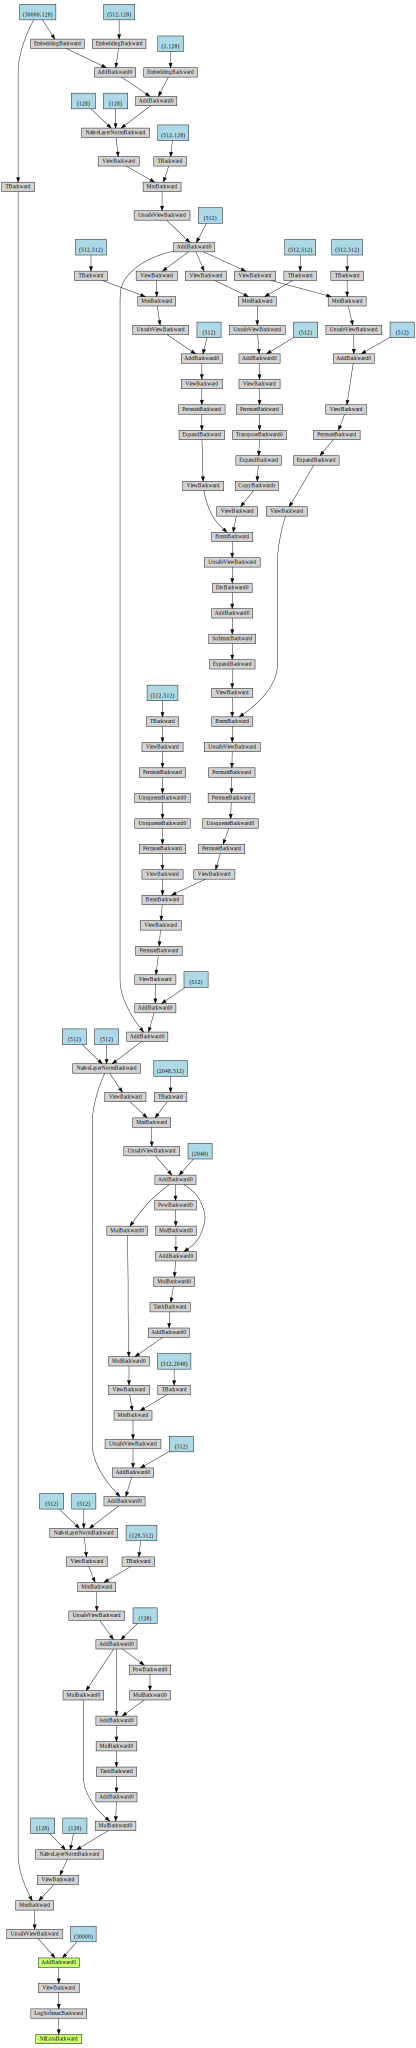

In [23]:
make_dot(outputs)